In [1]:
import kplot.kg
import gootools as gt
import corona as cr
import imageio
from kimport import *

irdap_main_path = "D:/Science/LBV/test_irdap" 

In [2]:
cr.load_irdap_flux_cal('AS-314')

FILE                                NAME               flux_annulus_star  \
0     6  AS-314-IRDIS_CI.OBJECT,FLUX17.fits  (512.5, 512.5, 0, 120, 0, 360)   

   Transmission ratio (OBJECT/FLUX)  DIT ratio (OBJECT/FLUX)  \
0                          7.941873                      1.0   

   Star total flux left (ADU)  Star total flux right (ADU)  \
0               812892.085053                827615.984611   

   Star total flux left+right (ADU)  Reference flux left (ADU)  \
0                      1.640508e+06               6.455886e+06   

   Reference flux right (ADU)  Reference flux left+right (ADU)  
0                6.572821e+06                     1.302871e+07

---
### Preprocessed Images
---

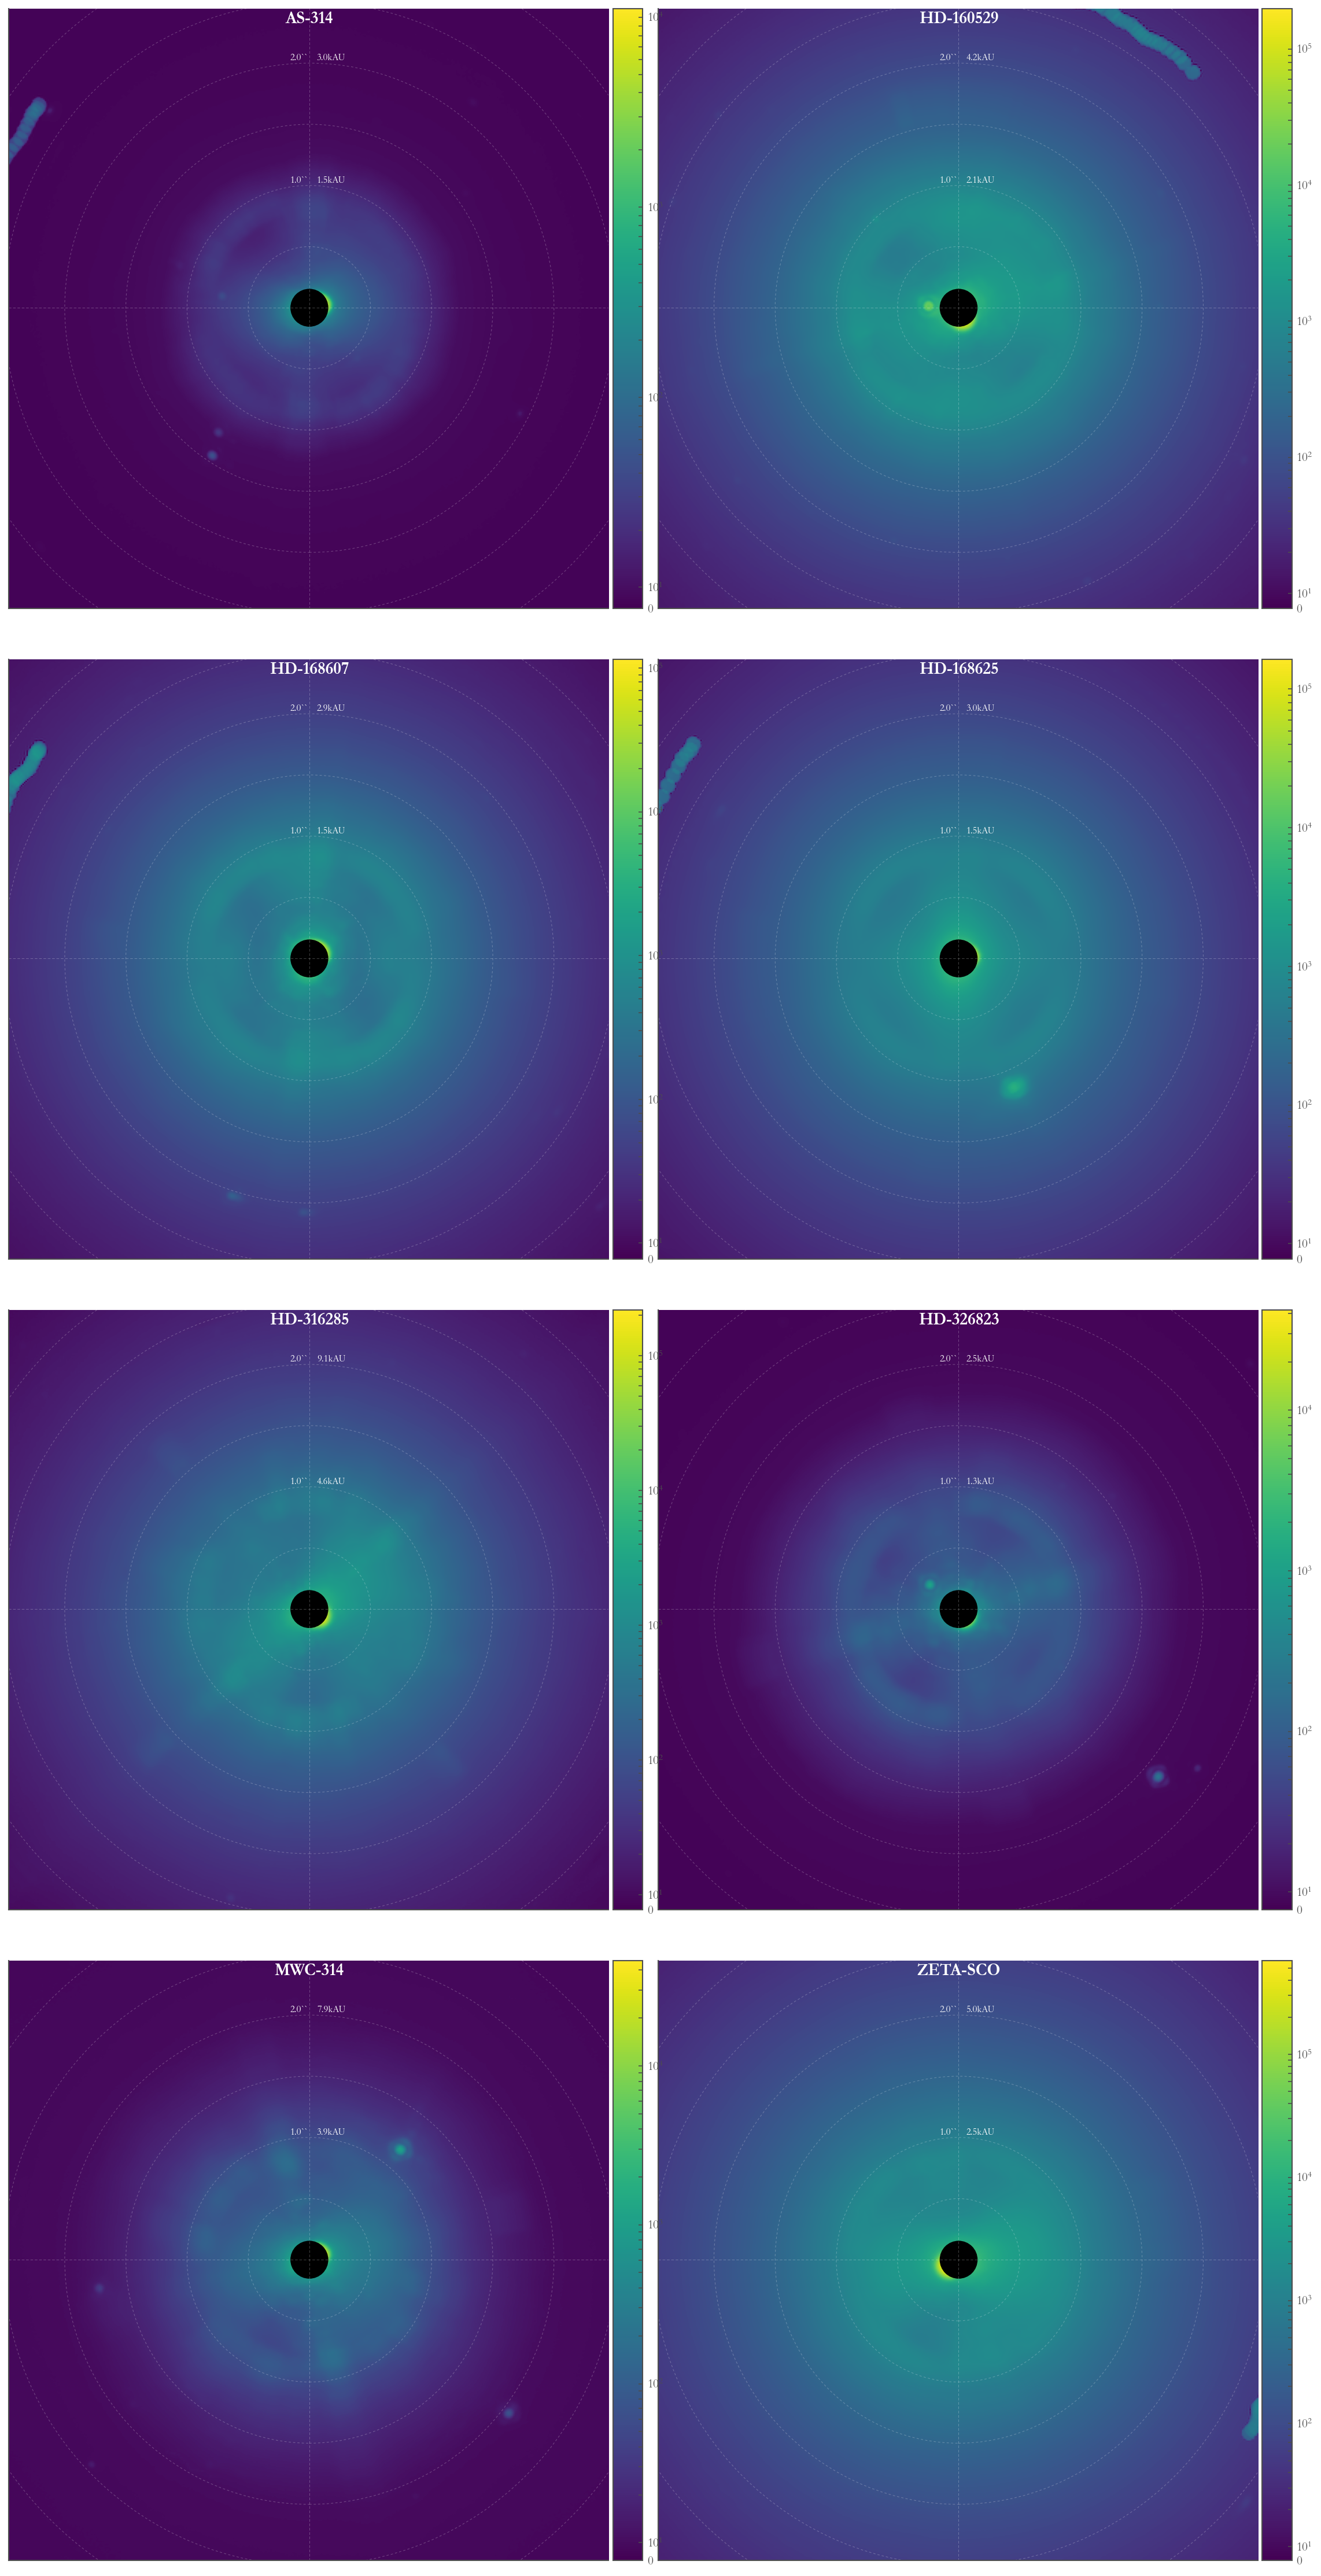

In [2]:
fig,axes = plt.subplots(4,2,figsize=[15,30])
for path,target,ax in zip(glob(irdap_main_path+'/*'),cr.targets,axes.flatten()):
    d,e = cr.load_preprocessed(target)
    obj_files = glob(path+'/raw/*OBJECT*.fits')
    d,e = cr.centered_crop(d,200),cr.centered_crop(e,200)
    cr.lbv_show(fig,ax,d,target)
#     ax.contour(dl+dr,levels=np.logspace(1,6,10))
    ax.text(d.shape[0]/2,d.shape[0]-10,target,color='white',ha='center',fontsize=14,fontweight='heavy')
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout(pad=0,h_pad=0,w_pad=0)
# plt.savefig('figures/preprocessed.png',dpi=300)

---
### ADI
---

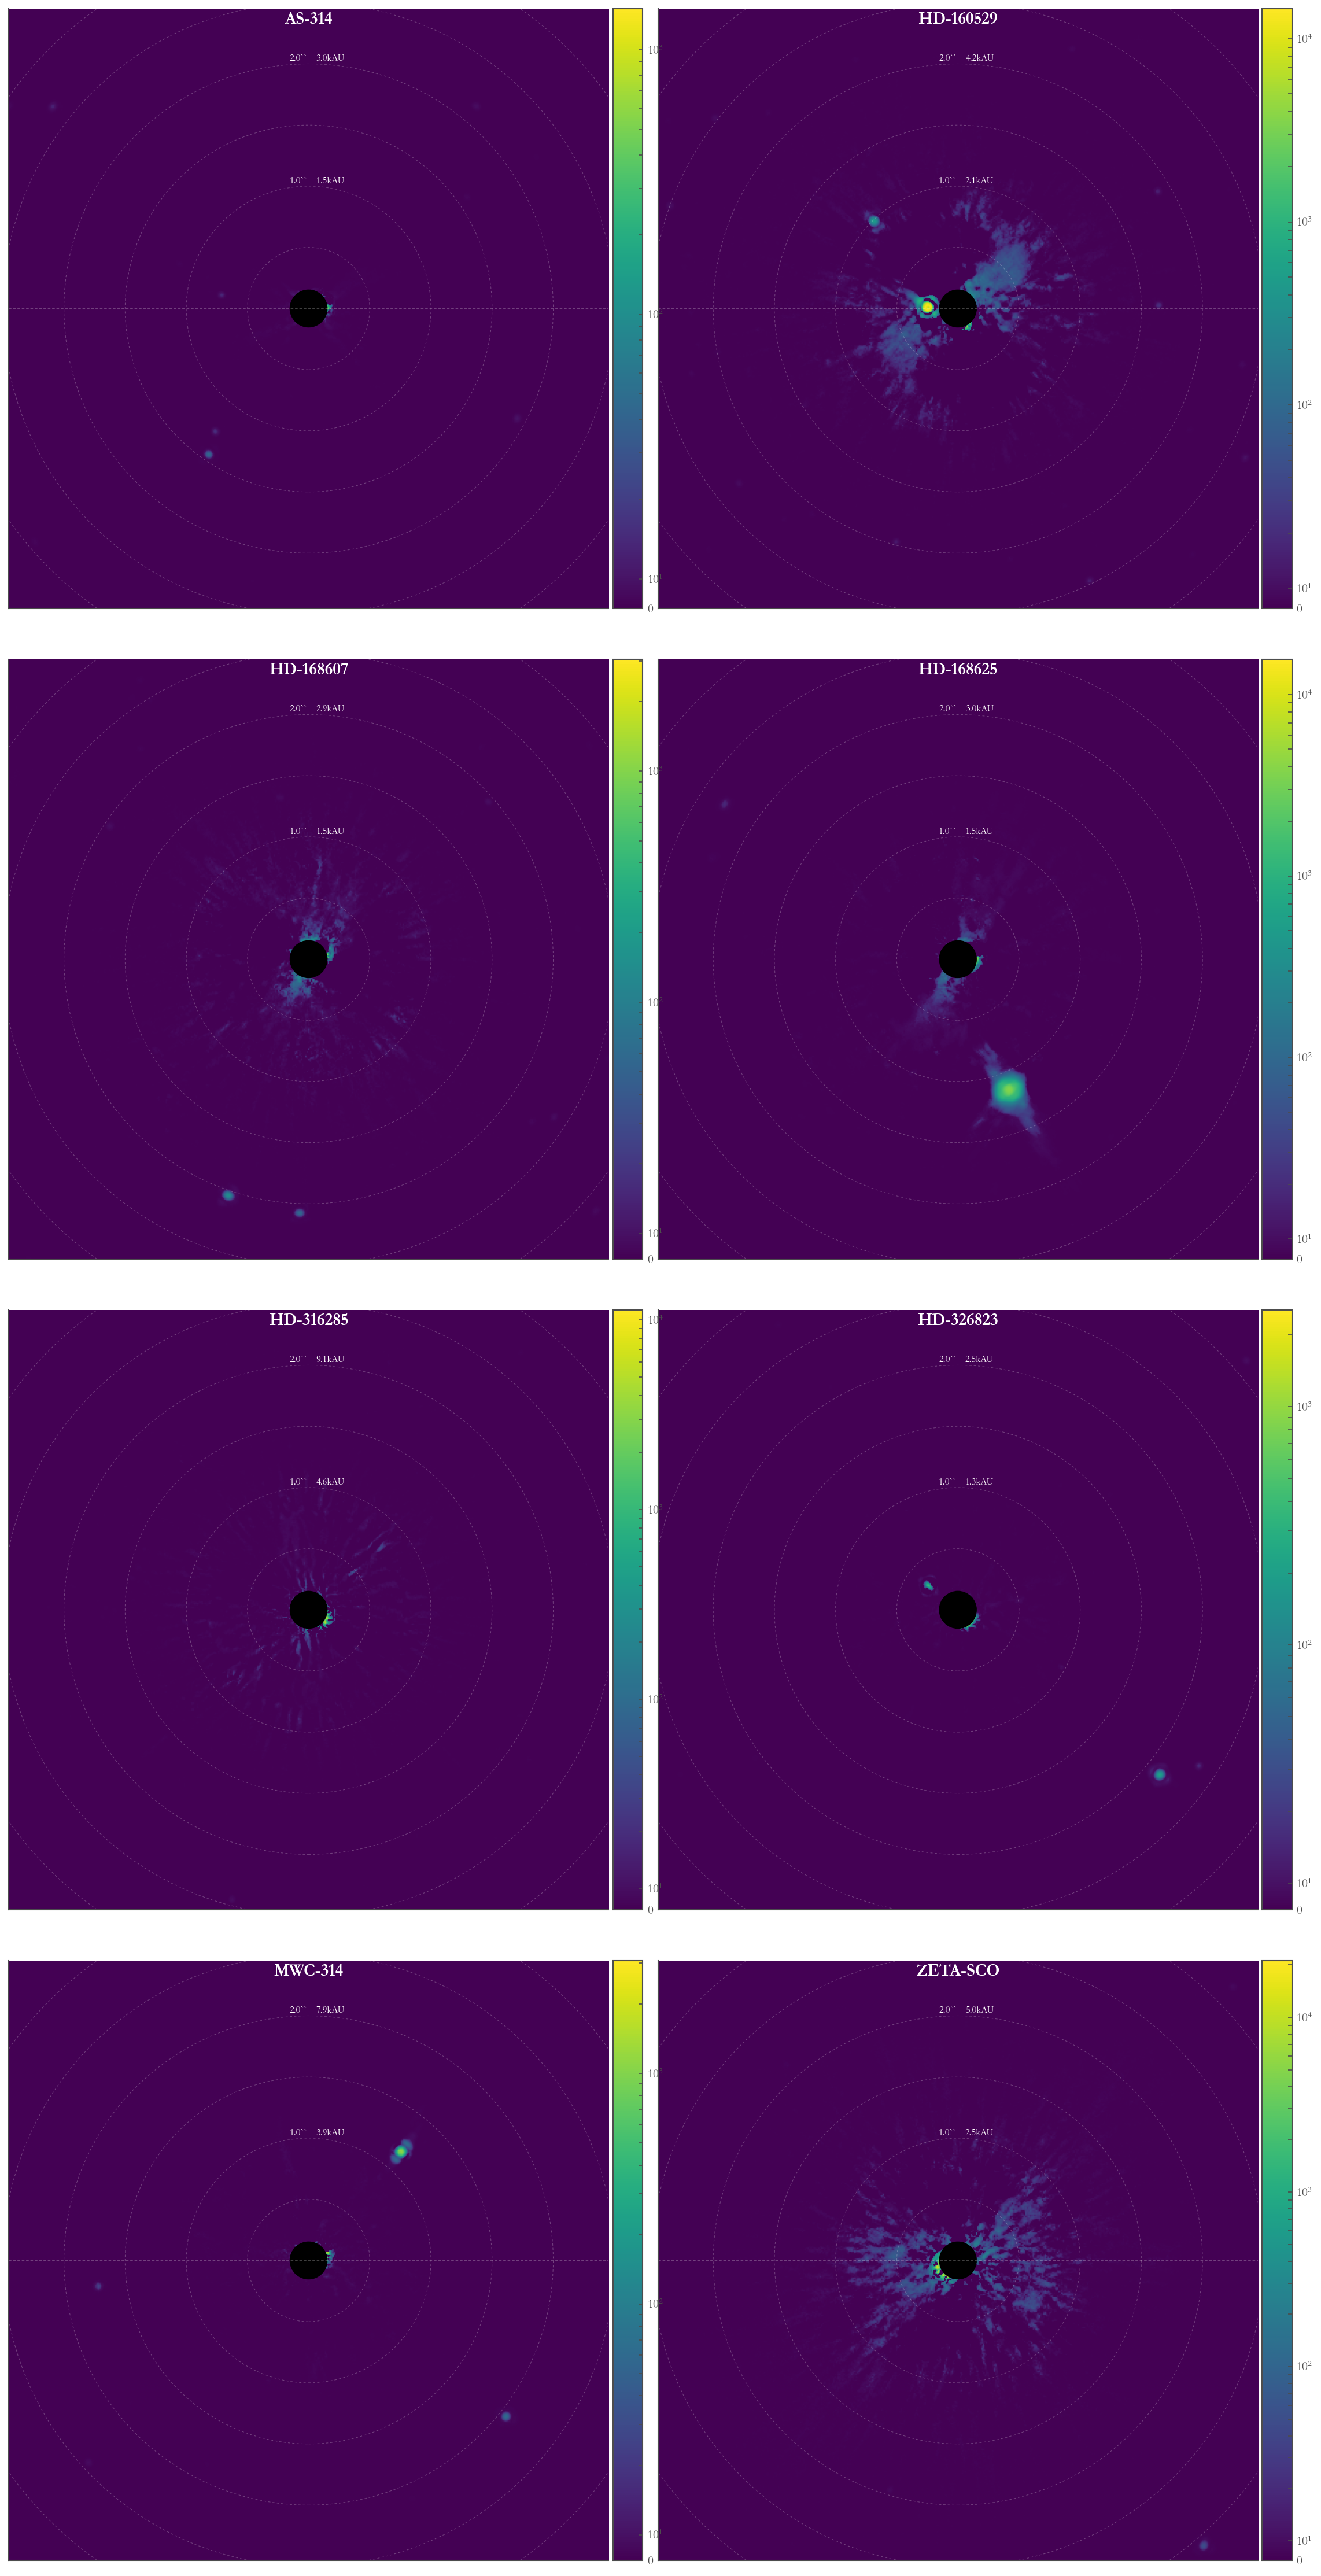

In [3]:
fig,axes = plt.subplots(4,2,figsize=[15,30])
rad = 200
for path,name,ax in zip(glob(irdap_main_path+'/*'),cr.targets,axes.flatten()):
    f = glob(path+'/reduced_adi/classical/*.fits')[1]
    d = cr.data(f)
    obj_files = glob(path+'/raw/*OBJECT*.fits')
    raw = [r    for r in obj_files if not any(['CENTER' in r,'FLUX' in r,'SKY' in r])]
#     angle = np.array([float(cr.header(r)['HIERARCH ESO INS4 DROT3 BEGIN'])    for r in raw])
#     angle = angle.max() + cr.pupil_offset + cr.true_north_correction
#     d = rotate(cr.data(f),-1*angle,reshape=False)
    cr.lbv_show(fig,ax,d,name)
    cr.center_lim(ax,rad)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(d.shape[0]/2,d.shape[0]/2+rad-10,name,color='white',ha='center',fontsize=14,fontweight='heavy')
fig.tight_layout(pad=0,h_pad=0,w_pad=0)
# plt.savefig('figures/cADI.png',dpi=300)

----
## Simbad Table
----

In [9]:
search_targets = ['AS 314','HD 160529','HD 168607','HD 168625','HD 316285','HD 326823','MWC 314','Zeta01 Sco']

In [10]:
s = Simbad()
s.reset_votable_fields()
s.remove_votable_fields('coordinates')
s.remove_votable_fields('main_id')
s.add_votable_fields('typed_id','ra','dec','plx','rv_value','sp','flux(H)')

c:\users\keyan\appdata\local\programs\python\python39\lib\site-packages\astroquery\simbad\core.py:460: UserWarning: All fields have been removed. Resetting to defaults.
  warnings.warn("All fields have been removed. "


In [13]:
t = s.query_objects(search_targets)
target_H = {name:h    for name,h in zip(search_targets,t["FLUX_H"])}
target_H

{'AS 314': 7.63,
 'HD 160529': 3.23,
 'HD 168607': 3.88,
 'HD 168625': 4.537,
 'HD 316285': 4.227,
 'HD 326823': 6.1,
 'MWC 314': 5.54,
 'Zeta01 Sco': 3.27}

In [12]:
df = pd.DataFrame({'Object':np.array(t['TYPED_ID'],dtype='str'), 
                   r'$\alpha$':t['RA'], 
                   r'$\delta$':t['DEC'],
                   'Distance':np.array(1000/t['PLX_VALUE'],dtype='int')/1000,
                   'Radial Velocity':t['RV_VALUE'],
                   'Spectral Type':np.array(t["SP_TYPE"],dtype='str'),
                   '$H$':t['FLUX_H']
                  })
print(df.to_latex())

\begin{tabular}{llllrrlr}
\toprule
{} &      Object &       \$\textbackslash alpha\$ &       \$\textbackslash delta\$ &  Distance &  Radial Velocity & Spectral Type &    \$H\$ \\
\midrule
0 &      AS 314 &  18 39 26.1023 &  -13 50 47.162 &     1.602 &            76.65 &          B9Ia &  7.630 \\
1 &   HD 160529 &  17 41 59.0257 &  -33 30 13.702 &     2.285 &           -35.00 &          A2Ia &  3.230 \\
2 &   HD 168607 &  18 21 14.8855 &  -16 22 31.760 &     1.553 &           -30.00 &        B9Iaep &  3.880 \\
3 &   HD 168625 &  18 21 19.5486 &  -16 22 26.077 &     1.609 &            -4.00 &         B6Iap &  4.537 \\
4 &   HD 316285 &  17 48 14.0369 &  -28 00 53.124 &     5.906 &              NaN &         B0Ieq &  4.227 \\
5 &   HD 326823 &  17 06 53.9048 &  -42 36 39.705 &     1.346 &              NaN &         WNpec &  6.100 \\
6 &     MWC 314 &  19 21 33.9773 &  +14 52 56.908 &     5.238 &            29.00 &         B3Ibe &  5.540 \\
7 &  Zeta01 Sco &  16 53 59.7270 &  -42 21 43.313

----
### Checking Satellite Spots
----
Check complete! These all look legit to me!

In [ ]:
for c in cr.centers:
    for t in cr.targets:
        if t in c:
            target_index = np.where(cr.targets==t)
            [xl,yl,xr,yr] = cr.center_coordinates[target_index][0]
            [left_spot,right_spot] = cr.satellite_spots[target_index][0]
            fig,ax = plt.subplots(1,figsize=[20,20])
            gt.logshow(fig,ax,cr.data(c)[0])
            ax.scatter([xl,xr],[yl,yr],s=10)
            ax.scatter(left_spot[0],right_spot[0],s=10,color='black')
            ax.scatter(left_spot[1]+1024,right_spot[1],s=10,color='black')
            ax.set_ylim(400,650)
            plt.savefig('figures/satellite_check/{}.png'.format(t))
            plt.show()

____
### GIF
___

In [ ]:
for gif,channel in zip([left_gif,right_gif],['left','right']):
    for target,name in zip(gif,cr.targets):
        print('\nCreating images for {}'.format(name))
        for i,image in enumerate(target):
            gt.progress_bar(i+1,target.shape[0])
            fig,ax = plt.subplots(1,figsize=[10,10])
            gt.logshow(fig,ax,image)
            plt.savefig('figures/gifs/raw/{}_{}_{}.png'.format(name,channel,i))
            plt.clf()
            plt.close()

In [ ]:
for name in cr.targets:
    for channel in ['left','right']:
        with imageio.get_writer('figures/gifs/{}_{}.gif'.format(name,channel), mode='I',duration = 0.25) as writer:
            print("\nCompiling GIF of {}".format(name))
            for i,filename in enumerate((file_list := glob('figures/gifs/raw/{}_{}*.png'.format(name,channel)))):
                gt.progress_bar(i+1,len(file_list))
                image = imageio.imread(filename)
                writer.append_data(image)

__________________________________________________________________    